# Predict __Price of a bottle of wine__

# Summary

The data summarize **258210** wine reviews:

__175000__ are the training set, the data on which to train your models;

The remaining __83210__ observations constitute the validation set (or score set), or the data on which you must make the estimate for the submission. The validation set at your disposal obviously does not contain the variable price, the price of the bottle of wine that the goal of your forecast.

 

## File descriptions

    - train.csv - the training set
    - test.csv - the test set
    - Sample_Submission.csv  - a sample submission file in the correct format
 
### Data fields

**country (String)** The country that the wine is from

**province (String)** The province or state that the wine is from

**region_1 (String)** The wine growing area in a province or state (ie Napa)

**region_2 (String)** Sometimes there are more specific regions within the wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

**winery (String)** The winery that made the wine

**variety (String)** The type of grapes used to make the wine (ie Pinot Noir)

**designation (String)** The vineyard within the winery where the grapes that made the wine are from

**taster_name (String)** taster name

**taster_twitter_handle (String)** taster twitter account name

**description (String)** A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.

**points (Numeric)** Number of points WineEnthusiast rated the wine on a scale of **1-100**

## __TARGET: price (Numeric) The cost for a bottle of wine__

The accuracy of your forecasts will be evaluated using the Root Mean Squared Error (RMSE).

An example code for the calculation:

RMSE = sqrt (mean ((predicted-true) ^ 2))

This leaderboard is calculated with approximately 30% of the test data.

The final results will be based on the other 70%, so the final standings may be different

# Import Libraries

In [1]:
# Import packages
import tensorflow as tf
# tf.enable_eager_execution()

from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import losses
from keras import metrics
from keras import optimizers
from keras.layers import Dropout

import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Downgrate numpy to fix a problem
# !pip install numpy==1.16.2
import numpy as np
print(np.__version__)

import matplotlib.pyplot as plt

import os

import numpy as np

import string

!pip install ipdb
import ipdb # deb

from gensim.models.keyedvectors import KeyedVectors

# Spliting data
from sklearn.model_selection import train_test_split

from sklearn import metrics # For RUC

from nltk.stem import PorterStemmer

import tensorflow_hub as hub
import pandas as pd
import re
import seaborn as sns

# from google.colab import files

from IPython import display

import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
1.16.5
  Created wheel for ipdb: filename=ipdb-0.12.2-cp36-none-any.whl size=9171 sha256=1a13f1207ce74b014ae9c910b66435543b7c5c8e2b1a5787076edc663143b274
  Stored in directory: /root/.cache/pip/wheels/7a/00/07/c906eaf1b90367fbb81bd840e56bf8859dbd3efe3838c0b4ba
Successfully built ipdb


In [ ]:
%matplotlib inline

In [1]:
train = pd.read_csv("./Datasets/train.csv")
test = pd.read_csv("./Datasets/test.csv")
test.drop(['price', 'index'], axis=1, inplace=True)

In [ ]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df['country'] = df['country'].fillna('') + ' ' + df['province'].fillna('')+\
    ' ' + df['region_1'].fillna('')+' ' + df['region_2'].fillna('')
    df['text'] = (df['description'].fillna('') + ' ' + df['country'] + ' ' + df['designation'].fillna(''))
    df['info'] = (df['text'].fillna('')+' '+df['taster_name'].fillna('')+' '+\
                  df['taster_twitter_handle'].fillna('')+\
                 ' ' + df['title'].fillna('') + df['variety'].fillna('')+df['winery'].fillna(''))
    return df[['country', 'text', 'info']]

In [ ]:
preprocess(train)

# Other Method (In class)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import math


from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
test.drop(['price', 'index'], axis=1, inplace=True)

In [ ]:
train.fillna(value='missing', inplace=True)
test.fillna(value='missing', inplace=True)

In [ ]:
# train['target'] = np.log1p(train['price'])

In [6]:
train.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,missing,missing,missing,missing,missing,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",missing,88.041695,28.0,Bordeaux,Lalande de Pomerol,missing,missing,missing,missing,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",missing,94.085021,130.0,Bordeaux,Saint-Émilion,missing,missing,missing,missing,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,missing,missing,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [7]:
test.tail()

,country,description,designation,points,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
83205,US,"A simple, direct wine, pretty full-bodied for ...",Le Pique-Nique,81.961663,California,Sonoma Valley,Sonoma,missing,missing,missing,ROSé,Wellington,83205
83206,US,"This dry, spicy wine shows the rustic, rugged ...",Rebecca's Vineyard,87.162191,California,Dry Creek Valley,Sonoma,missing,missing,missing,CABERNET SAUVIGNON,Forth,83206
83207,Italy,"Attractive apricot, peach and honey aromas vie...",Aurente,89.057585,Central Italy,Umbria,missing,missing,missing,missing,CHARDONNAY,Lungarotti,83207
83208,France,Red cherries and jelly fruits highlight a wine...,missing,84.907909,Burgundy,Bourgogne,missing,missing,missing,missing,PINOT NOIR,Bouchard Père & Fils,83208
83209,Italy,Tasca d'Almerita makes what may be the best ex...,missing,92.038702,Sicily & Sardinia,Sicilia,missing,missing,missing,missing,CABERNET SAUVIGNON,Tasca d'Almerita,83209


In [8]:
print("Handling categorical variables...")
le = LabelEncoder()

le.fit(np.hstack([train.country, test.country]))
train['country'] = le.transform(train.country)
test['country'] = le.transform(test.country)

le.fit(np.hstack([train.province, test.province]))
train['province'] = le.transform(train.province)
test['province'] = le.transform(test.province)

le.fit(np.hstack([train.taster_name, test.taster_name]))
train['taster_name'] = le.transform(train.taster_name)
test['taster_name'] = le.transform(test.taster_name)

le.fit(np.hstack([train.taster_twitter_handle, test.taster_twitter_handle]))
train['taster_twitter_handle'] = le.transform(train.taster_twitter_handle)
test['taster_twitter_handle'] = le.transform(test.taster_twitter_handle)

le.fit(np.hstack([train.region_2, test.region_2]))
train['region_2'] = le.transform(train.region_2)
test['region_2'] = le.transform(test.region_2)

# le.fit(np.hstack([train.id, test.id]))
# train['id'] = le.transform(train.id)
# test['id'] = le.transform(test.id)

del le

train.head(3)

Handling categorical variables...


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,34,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,8,missing,18,19,15,missing,PORTUGUESE RED,J. Portugal Ramos,32027
1,15,"A solid, chunky wine, with a structure that is...",missing,88.041695,28.0,38,Lalande de Pomerol,18,19,15,missing,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,15,"This is powerful and concentrated, with the hi...",missing,94.085021,130.0,38,Saint-Émilion,18,19,15,missing,BORDEAUX-STYLE RED BLEND,Château Figeac,32440


In [9]:
#PROCESS TEXT: RAW
print("Text to seq process...")
print("   Fitting tokenizer...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.description.str.lower(), 
                      train.designation.str.lower(), 
                      train.region_1.str.lower(),
                      train.title.str.lower(),
                      train.variety.str.lower(),
                      train.winery.str.lower()])

tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print("   Transforming text to seq...")

train["seq_description"] = tok_raw.texts_to_sequences(train.description.str.lower())
test["seq_description"] = tok_raw.texts_to_sequences(test.description.str.lower())

train["seq_designation"] = tok_raw.texts_to_sequences(train.designation.str.lower())
test["seq_designation"] = tok_raw.texts_to_sequences(test.designation.str.lower())

train["seq_region_1"] = tok_raw.texts_to_sequences(train.region_1.str.lower())
test["seq_region_1"] = tok_raw.texts_to_sequences(test.region_1.str.lower())

train["seq_title"] = tok_raw.texts_to_sequences(train.title.str.lower())
test["seq_title"] = tok_raw.texts_to_sequences(test.title.str.lower())

train["seq_variety"] = tok_raw.texts_to_sequences(train.variety.str.lower())
test["seq_variety"] = tok_raw.texts_to_sequences(test.variety.str.lower())

train["seq_winery"] = tok_raw.texts_to_sequences(train.winery.str.lower())
test["seq_winery"] = tok_raw.texts_to_sequences(test.winery.str.lower())
train.head(3)

Text to seq process...
   Fitting tokenizer...
   Transforming text to seq...


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id,seq_description,seq_designation,seq_region_1,seq_title,seq_variety,seq_winery
0,34,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,8,missing,18,19,15,missing,PORTUGUESE RED,J. Portugal Ramos,32027,"[7, 8, 3, 127, 51, 107, 9, 13, 40, 37, 78, 19,...","[3613, 102, 160]",[5],[5],"[311, 15]","[659, 1789, 2300]"
1,15,"A solid, chunky wine, with a structure that is...",missing,88.041695,28.0,38,Lalande de Pomerol,18,19,15,missing,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079,"[3, 242, 614, 9, 6, 3, 131, 19, 8, 60, 4, 7094...",[5],"[3591, 43, 2529]",[5],"[86, 58, 15, 20]","[101, 1804, 375, 10929]"
2,15,"This is powerful and concentrated, with the hi...",missing,94.085021,130.0,38,Saint-Émilion,18,19,15,missing,BORDEAUX-STYLE RED BLEND,Château Figeac,32440,"[7, 8, 332, 1, 184, 6, 2, 213, 2228, 4, 27, 23...",[5],"[430, 1258]",[5],"[86, 58, 15, 20]","[101, 9386]"


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 20 columns):
country                  175000 non-null int64
description              175000 non-null object
designation              175000 non-null object
points                   175000 non-null float64
price                    175000 non-null float64
province                 175000 non-null int64
region_1                 175000 non-null object
region_2                 175000 non-null int64
taster_name              175000 non-null int64
taster_twitter_handle    175000 non-null int64
title                    175000 non-null object
variety                  175000 non-null object
winery                   175000 non-null object
id                       175000 non-null int64
seq_description          175000 non-null object
seq_designation          175000 non-null object
seq_region_1             175000 non-null object
seq_title                175000 non-null object
seq_variety              1750

In [11]:
train['winery'].apply(lambda x: len(x) ).mean()

11.953577142857142

In [ ]:
#EMBEDDINGS MAX VALUE
#Base on the average lenght of each word in each categories
MAX_Description = 245
MAX_Designation = 15
MAX_Region_1 = 15
MAX_Title = 29
MAX_Variety = 15
MAX_Winery = 15

MAX_TEXT = np.max([np.max(train.seq_description.max())
                   , np.max(test.seq_description.max())
                   , np.max(train.seq_designation.max())
                   , np.max(test.seq_designation.max())
                   , np.max(train.seq_region_1.max())
                   , np.max(test.seq_region_1.max())
                   , np.max(train.seq_title.max())
                   , np.max(test.seq_title.max())
                   , np.max(train.seq_variety.max())
                   , np.max(test.seq_variety.max())
                   , np.max(train.seq_winery.max())
                   , np.max(test.seq_winery.max())])+2
MAX_Country = np.max([train.country.max(), test.country.max()])+1
MAX_Province = np.max([train.province.max(), test.province.max()])+1
MAX_Taster_name = np.max([train.taster_name.max(), test.taster_name.max()])+1
MAX_Taster_twitter_handle = np.max([train.taster_twitter_handle.max(), test.taster_twitter_handle.max()])+1
MAX_Region_2 = np.max([train.region_2.max(), test.region_2.max()])+1
# MAX_id= np.max([train.id.max(), test.id.max()])+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ae45ef8d0>]],
      dtype=object)

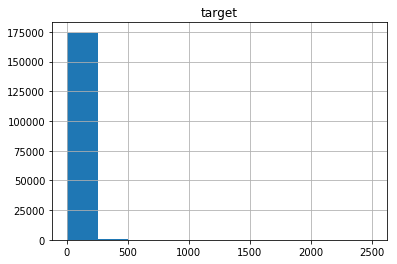

In [13]:
# target_scaler = MinMaxScaler(feature_range=(-1, 1))
# train["target"] = target_scaler.fit_transform(train[['target']].values.reshape(-1,1))
train["target"] = train["price"]
pd.DataFrame(train.target).hist()

# train["target"] = np.log(train.price+1)
# target_scaler = MinMaxScaler(feature_range=(-1, 1))
# train["target"] = target_scaler.fit_transform(train[['target']].values.reshape(-1,1))
# pd.DataFrame(train.target).hist()

In [24]:
#EXTRACT DEVELOPTMENT TEST
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.9999)
print(dtrain.shape)
print(dvalid.shape)

(174982, 21)
(18, 21)


In [ ]:
#KERAS DATA DEFINITION
from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'country': np.array(dataset.country)
        ,'description': pad_sequences(dataset.seq_description, 
                                      maxlen=MAX_Description)
        ,'designation': pad_sequences(dataset.seq_designation, 
                                      maxlen=MAX_Description)
        ,'points_imp': np.array(dataset[["points"]])
        ,'province': np.array(dataset.province)
        ,'region_1': pad_sequences(dataset.seq_region_1, 
                                   maxlen=MAX_Region_1)
        ,'region_2': np.array(dataset.region_2)
        ,'taster_name': np.array(dataset.taster_name)
        ,'taster_twitter_handle': np.array(dataset.taster_twitter_handle)
        ,'title': pad_sequences(dataset.seq_title
                                        , maxlen=MAX_Title)
        ,'variety': pad_sequences(dataset.seq_variety
                                        , maxlen=MAX_Variety)
        ,'winery': pad_sequences(dataset.seq_winery
                                        , maxlen=MAX_Winery)
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

In [26]:
#KERAS MODEL DEFINITION
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization, LSTM
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
#     msave = ModelCheckpoint(filepath, save_best_only=True)
    return es

def rmse_cust(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

def get_model():
    #params
    dr_r = 0.01
    dr_d = 0.01
    
    #Inputs
    country = Input(shape=[1], name="country")
    description = Input(shape=[X_train["description"].shape[1]], 
                        name="description")
    designation = Input(shape=[X_train["designation"].shape[1]], 
                        name="designation")
    points_imp = Input(shape=[1], name="points_imp")
    province = Input(shape=[1], name="province")
    region_1 = Input(shape=[X_train["region_1"].shape[1]], 
                     name="region_1")
    region_2 = Input(shape=[1], name="region_2")
    taster_name = Input(shape=[1], name="taster_name")
    taster_twitter_handle = Input(shape=[1], name="taster_twitter_handle")
    title = Input(shape=[X_train["title"].shape[1]], 
                  name="title")
    variety = Input(shape=[X_train["variety"].shape[1]], 
                  name="variety")
    winery = Input(shape=[X_train["winery"].shape[1]], name="winery")
    
    
    #Embeddings layers
    emb_size = 200
        
    emb_country = Embedding(MAX_Country, 20)(country)
    emb_description = Embedding(MAX_TEXT, 200)(description)
    emb_designation = Embedding(MAX_TEXT, 60)(designation)
#     emb_category_name = Embedding(MAX_TEXT, emb_size//3)(category_name)
    emb_province = Embedding(MAX_Province, 60)(province)
    emb_region_1 = Embedding(MAX_TEXT, 60)(region_1)
    emb_region_2 = Embedding(MAX_Region_2, 20)(region_2)
    
    emb_taster_name = Embedding(MAX_Taster_name, 10)(taster_name)
    emb_taster_twitter_handle = Embedding(MAX_Taster_twitter_handle,
                                          20)(taster_twitter_handle)
    emb_title = Embedding(MAX_TEXT, 10)(title)
    emb_variety = Embedding(MAX_TEXT, 10)(variety)
    emb_winery = Embedding(MAX_TEXT, 10)(winery)
    
    #rnn layer
    rnn_layer1 = GRU(32) (emb_description)
    rnn_layer2 = GRU(32) (emb_designation)
    rnn_layer3 = GRU(32) (emb_region_1)
    rnn_layer4 = GRU(32) (emb_title)
    rnn_layer5 = GRU(32) (emb_variety)
    rnn_layer6 = GRU(32) (emb_winery)
    
    #main layer
    main_l = concatenate([
        Flatten() (emb_country)
        , Flatten() (emb_province)
        , Flatten() (emb_region_2)
        , Flatten() (emb_taster_name)
        , Flatten() (emb_taster_twitter_handle)
        , rnn_layer1
        , rnn_layer2
        , rnn_layer3
        , rnn_layer4
        , rnn_layer5
        , rnn_layer6
        , points_imp
    ])
    main_l = Dropout(dr_r) (Dense(512,activation='elu') (main_l))
    main_l = Dropout(dr_d) (Dense(32,activation='elu') (main_l))
    
    #output
    output = Dense(1, activation="linear") (main_l)
    
    
    #model
    model = Model([country, description, designation,
                   points_imp, province, region_1, region_2,
                  taster_name, taster_twitter_handle, title,
                  variety, winery], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mse"])
    
    return model

    
model = get_model()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
country (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
province (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
region_2 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
taster_name (InputLayer)        (None, 1)            0                                            
____________________________________________________________________________________________

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('val_mse')<250):
                print("\nReached 90% val_acc so cancelling training!")
                self.model.stop_training = True
import numpy as np

class EarlyStoppingAtMinLoss(tf.keras.callbacks.Callback):
  """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

  def __init__(self, patience=2):
    super(EarlyStoppingAtMinLoss, self).__init__()

    self.patience = patience

    # best_weights to store the weights at which the minimum loss occurs.
    self.best_weights = None

  def on_train_begin(self, logs=None):
    # The number of epoch it has waited when loss is no longer minimum.
    self.wait = 0
    # The epoch the training stops at.
    self.stopped_epoch = 0
    # Initialize the best as infinity.
    self.best = np.Inf

  def on_epoch_end(self, epoch, logs=None):
    current = logs.get('loss')
    if np.less(current, self.best):
      self.best = current
      self.wait = 0
      # Record the best weights if current results is better (less).
      self.best_weights = self.model.get_weights()
    else:
      self.wait += 1
      if self.wait >= self.patience:
        self.stopped_epoch = epoch
        self.model.stop_training = True
        print('Restoring model weights from the end of the best epoch.')
        self.model.set_weights(self.best_weights)

  def on_train_end(self, logs=None):
    if self.stopped_epoch > 0:
      print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))
    
EarlyStoppingAtMinLoss = EarlyStoppingAtMinLoss()

In [30]:
#FITTING THE MODEL
BATCH_SIZE = 512 * 3
epochs = 30

model = get_model()
model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_valid, dvalid.target)
          , verbose=1, callbacks=[EarlyStoppingAtMinLoss])

Train on 174982 samples, validate on 18 samples
Epoch 1/30
174982/174982 [==============================] - 140s 803us/step - loss: 1251.8786 - mean_squared_error: 1251.8786 - val_loss: 102.7360 - val_mean_squared_error: 102.7360
Epoch 2/30
174982/174982 [==============================] - 133s 760us/step - loss: 686.5685 - mean_squared_error: 686.5685 - val_loss: 41.5025 - val_mean_squared_error: 41.5025
Epoch 3/30
174982/174982 [==============================] - 134s 765us/step - loss: 415.5797 - mean_squared_error: 415.5797 - val_loss: 15.8094 - val_mean_squared_error: 15.8094
Epoch 4/30
174982/174982 [==============================] - 134s 768us/step - loss: 290.8817 - mean_squared_error: 290.8817 - val_loss: 33.9229 - val_mean_squared_error: 33.9229
Epoch 5/30
174982/174982 [==============================] - 133s 762us/step - loss: 219.3482 - mean_squared_error: 219.3482 - val_loss: 17.2397 - val_mean_squared_error: 17.2397
Epoch 6/30
174982/174982 [==============================] 

In [ ]:
# Save entire model to a HDF5 file
# model.save('group_1_model_1.h5')  # creates a HDF5 file 'my_model.h5'
## del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model_saved = load_model('group_1_model.h5')

In [31]:
#EVLUEATE THE MODEL ON DEV TEST: What is it doing?
val_preds = model.predict(X_valid)
# val_preds = target_scaler.inverse_transform(val_preds)
# val_preds = np.exp(val_preds)-1

#mean_absolute_error, mean_squared_log_error
y_true = np.array(dvalid.price.values)
y_pred = val_preds[:,0]
v_rmse = rmse_cust(y_true, y_pred)
print(" RMSE error on dev test: "+str(v_rmse)) # 0.90484619140625

 RMSE error on dev test: 7.0365565005813355


In [51]:
val_preds = model.predict(X_valid)
val_preds

array([[19.095154]], dtype=float32)

In [32]:
y_true = np.array(dvalid.price.values)
y_pred = val_preds[:,0]
v_rmsle = rmse_cust(y_true, y_pred)

print(" RMSE error on dev test: "+str(v_rmsle)) #5.583566891952288 = 29.78

 RMSE error on dev test: 7.0365565005813355


In [ ]:
#EVLUEATE THE MODEL ON DEV TEST: What is it doing?
# val_preds = model.predict(X_valid)
# val_preds = target_scaler.inverse_transform(val_preds)
# val_preds = np.exp(val_preds)+1

# #mean_absolute_error, mean_squared_log_error
# y_true = np.array(dvalid.price.values)
# y_pred = val_preds[:,0]
# v_rmsle = rmse_cust(y_true, y_pred)
# print(" RMSE error on dev test: "+str(v_rmsle))

In [21]:
#CREATE PREDICTIONS
preds = model.predict(X_test, batch_size=BATCH_SIZE)
# preds = target_scaler.inverse_transform(preds)
# preds = np.exp(preds)-1

preds

array([[125.8153  ],
       [ 22.467514],
       [ 54.032703],
       ...,
       [ 42.47091 ],
       [ 22.948236],
       [ 61.371212]], dtype=float32)

In [22]:
output = test[['id']]
output['price']=preds.reshape(-1,1)
output.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,price
0,0,125.815300
1,1,22.467514
2,2,54.032703
3,3,29.546467
4,4,13.383314


In [ ]:
output.to_csv('last_chance_2.csv',index=False)

# other Investigations

In [4]:
train.tail()

In [6]:
train.info()

In [ ]:
train.id.nunique()

In [ ]:
train.dtypes

## Investigating on __NAN__ values

We have 14 columns and we need to investigate each and everyone of them, we have a total of $175000$ examples

In [ ]:
# train.dropna(thresh=2)

In [ ]:
train.fillna(value='Missing')

In [ ]:
test.fillna(value='Missing')

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.dtypes.value_counts()

In [ ]:
train.nunique()

In [ ]:
test.nunique()

In [ ]:
sns.countplot(x='region_2',data=train)

In [ ]:
train.region_2.value_counts()

In [ ]:
test.region_2.value_counts()

In [ ]:
test.nunique()

In [ ]:
sns.countplot(x='region_2',data=test)

## Numerical 

In [ ]:
train.columns[train.dtypes != 'object']

### Points

In [ ]:
train[train.points.isnull()].head()

In [ ]:
train.points.isnull().sum()

In [ ]:
sns.distplot(train['points'])

In [ ]:
train['points'].describe()

### Price

In [ ]:
train[train.price.isnull()].head()

In [ ]:
train.price.isnull().sum()

In [ ]:
sns.distplot(train['price'])

In [ ]:
train['points'].describe()

In [ ]:
train['price_log'] = np.log(train.price+1)

In [ ]:
sns.distplot(train['price_log'])

### Id

In [ ]:
train[train.id.isnull()].head()

In [ ]:
train.id.isnull().sum()

In [ ]:
sns.distplot(train['id'])

In [ ]:
train['id'].describe()

In [ ]:
train['id'].nunique()

__It clear that there is no issue with numerical features, regarding missing values__

## Categorical features

In [ ]:
train.columns[train.dtypes == 'object']

### Country

In [ ]:
train[train.country.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Country".format(train.country.isnull().sum()*100/train.index.nunique()))

In [ ]:
sns.countplot(x='country',data=train)

In [ ]:
train['country'].nunique()

In [ ]:
selected = ['Croatia', 'Mexico', 'Georgia', 'Moldova', 'Brazil', 'England', 'Lebanon', 'Morocco', 'Cyprus', 'Macedonia',
'Serbia' , 'India', 'Czech Republic', 'Ukraine, Peru', 'Luxembourg', 'Switzerland', 'Lithuania',
 'Bosnia and Herzegovina', 'China', 'Slovakia', 'Armenia', 'Japan', 'South Korea']

In [ ]:
train['country'].value_counts()

In [ ]:
def cut_levels(x, threshold, new_value):
    value_counts = x.value_counts()
    labels = value_counts.index[value_counts < threshold]
    x[np.in1d(x, labels)] = new_value

In [ ]:
cut_levels(train.country, 30, 'other')
cut_levels(test.country, 30, 'other')

In [ ]:
train['country'].value_counts()

In [ ]:
sns.countplot(x='country',data=train)

### Description

In [ ]:
train[train.description.isnull()].head()

In [ ]:
train.description.isnull().sum()

In [ ]:
import regex as re
import nltk
nltk.download('stopwords')
import string  
from nltk.corpus import stopwords


In [ ]:
# add a column of word counts to both the training and test set
train['desc_len'] = train['description'].apply(lambda x: len(x))
test['desc_len'] = test['description'].apply(lambda x: len(x))

In [ ]:
description_tr = train.description
description_tst = test.description

# texts_tr = clean_doc(train_df.sentence)
# texts_tst = clean_doc(test_df.sentence)

# Training 92916
# Considers only the top 
# 20,000 words in the dataset
max_words = 10

tokenizer_tr = Tokenizer(num_words=max_words)
# tokenizer_tr = Tokenizer()
tokenizer_tr.fit_on_texts(description_tr)
# data_tr = tokenizer_tr.texts_to_sequences(description_tr)
tfidf_train = tokenizer_tr.texts_to_matrix(description_tr, mode='tfidf')
bin_tr = tokenizer_tr.texts_to_matrix(description_tr, mode='binary')


# # Testing 
tokenizer_tst = Tokenizer(num_words=max_words)
# # tokenizer_tst = Tokenizer()
tokenizer_tst.fit_on_texts(description_tst)
# data_tst = tokenizer_tst.texts_to_sequences(texts_tst)
tfidf_tst = tokenizer_tr.texts_to_matrix(description_tst, mode='tfidf')
bin_tst = tokenizer_tr.texts_to_matrix(description_tst, mode='binary')


# word_index = tokenizer_tr.word_index
# print('Found %s unique tokens.' % len(set(word_index))) #88582 

In [ ]:
tfidf_train

In [ ]:
tfidf_train[:]
desc_tdidf_tr = pd.DataFrame(tfidf_train)
desc_tdidf_tst = pd.DataFrame(tfidf_tst)

In [ ]:
train_selected = pd.concat([train, desc_tdidf_tr], axis=1)

In [ ]:
test_selected = pd.concat([test, desc_tdidf_tst], axis=1)

In [ ]:
test_selected

### Designation

In [ ]:
train[train.designation.isnull()].head()

In [ ]:
 print("We have {:.4} % of missing values in the feature Designation".format(train.designation.isnull().sum()*100/train.index.nunique()))

In [ ]:
sns.countplot(x='designation',data=train)

### Province

In [ ]:
train[train.province.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Province".format(train.province.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.province.isnull().sum()

In [ ]:
train.province.describe()

In [ ]:
sns.countplot(x='province',data=train)

### Region 1

In [ ]:
train[train.region_1.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Region 1".format(train.region_1.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.region_1.isnull().sum()

### Region 2

In [ ]:
train[train.region_2.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Region 2".format(train.region_2.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.region_2.isnull().sum()

### Taster Name 

In [ ]:
train[train.taster_name.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Taster Name".format(train.taster_name.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.taster_name.isnull().sum()

### Taster Twitter Handle

In [ ]:
train[train.taster_twitter_handle.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Taster Twitter Handle".format(train.taster_twitter_handle.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.taster_twitter_handle.isnull().sum()

### Title 

In [ ]:
train[train.title.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Title".format(train.title.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.title.isnull().sum()

### Variety 

In [ ]:
train[train.variety.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Variety".format(train.variety.isnull().sum()*100/train.index.nunique()))

In [ ]:
train.variety.isnull().sum()

### Winery

In [ ]:
train[train.winery.isnull()].head()

In [ ]:
print("We have {:.4} % of missing values in the feature Winery".format(train.winery.isnull().sum().sum()*100/train.index.nunique()))

In [ ]:
train.winery.isnull().sum()

## Analysis 

### Numerical variables 

In [ ]:
numerical_train = train[train.columns[train.dtypes != 'object']]

In [ ]:
numerical_train.info()

In [ ]:
sns.heatmap(numerical_train.corr(),cmap='coolwarm')

### Categorical 

In [ ]:
categorical_train = train[train.columns[train.dtypes == 'object']]
categorical_train.head()

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.formula.api import ols 

In [ ]:
# train.

In [ ]:
# Anove_test_F_value = []
# Anove_test_P_value = []
# variable_name_list = []

# for variable in categorical_train.columns:
#     print(variable)
#     mod = ols('price ~ '+variable, data = train).fit()
#     aov_table = sm.stats.anova_lm(mod, type=2)
#     Fvalue = aov_table.loc[variable, 'F']
#     Pvalue = aov_table.loc[variable, 'PR(>F)']
#     variable_name_list.append(variable)
#     Anove_test_F_value.append(Fvalue)
#     Anove_test_P_value.append(Pvalue)
    
# Anova_categorical_variable_test = pd.DataFrame({'Variable':variable_name_list, "F Value":Anove_test_F_value, \
#                                                "P Value":Anove_test_P_value})

In [ ]:
# >>> import statsmodels.api as sm
# >>> from statsmodels.formula.api import ols
# >>> moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
# >>> data = moore.data
# >>> data = data.rename(columns={"partner.status" :
# ...                             "partner_status"}) # make name pythonic

# for var in data.columns:
#         oore_lm = ols('conformity ~'+var,
# ...                 data=data).fit()
#         table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
#         print(table)
# # >>> moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
# # ...                 data=data).fit()
# # >>> table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
# # >>> print(table)

In [ ]:
categorical_train.columns

We are selecting only those with few missing data to greate one hot encoding 

In [ ]:
dummy_fields = ['region_2', 'taster_name', 'taster_twitter_handle']
# train[train.columns[train.dtypes == 'object']], 'country'
train_select = numerical_train
for each in dummy_fields:
    dummies = pd.get_dummies(train[each], prefix=each)
    train_select = pd.concat([train_select, dummies], axis=1)

numerical_test = test[test.columns[test.dtypes != 'object']]
test_select = numerical_test
for each in dummy_fields:
    dummies = pd.get_dummies(test[each], prefix=each)
    test_select = pd.concat([test_select, dummies], axis=1)
test_select.drop(['index', 'price'], axis=1, inplace=True)

In [ ]:
test.columns

In [ ]:
train.columns

In [ ]:
train.country.value_counts().count()

In [ ]:
test.country.value_counts().count()

In [ ]:
test_select

In [ ]:
train_select.describe()

In [ ]:
# quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in train_select.columns:
    mean, std = train_select[each].mean(), train_select[each].std()
    scaled_features[each] = [mean, std]
    train_select.loc[:, each] = (train_select[each] - mean)/std

In [ ]:
train_select.describe()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# numerical_train_selected_min = MinMaxScaler().fit_transform(numerical_train_selected)

In [ ]:
# numerical_train_selected_min.describe()

In [ ]:
# TODO: Scale the columns
# numerical_train_selected.points=processed_data.gre/800
# processed_data.gpa=processed_data.gpa/4.0

In [ ]:
train_select.shape

In [ ]:
# X = numerical_train_selected.drop(labels="price", axis=1)
train_features = train_select.drop(labels="price", axis=1)

In [ ]:
# y = numerical_train_selected['price']
train_targets = train_select[['price']]

## Random Forest

In [ ]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
model = RandomForestRegressor(n_estimators=500, criterion="mse", n_jobs=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_targets, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
print (np.sqrt(mean_absolute_error(y_preds,y_test)))

## Catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model_cat = CatBoostRegressor()

In [ ]:
# Total Training 
model_cat.fit(X_train, y_train, silent=True)

In [ ]:
preds = model_cat.predict(X_test)

In [ ]:
print (np.sqrt(metrics.mean_absolute_error(preds,y_test)))